In [1]:
#Importing all the standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
db=pd.read_csv('diabeties.csv') #load dataset

In [3]:
db.head() # displays first 5 records

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
db.isnull().sum()  #checking the null values

pregnant     0
glocose      0
bp           0
skin         0
insulin      0
bmi          0
predigree    0
age          0
target       0
dtype: int64

In [6]:
db.columns

Index(['pregnant', 'glocose', 'bp', 'skin', 'insulin', 'bmi', 'predigree',
       'age', 'target'],
      dtype='object')

In [7]:
X=db.drop('target',axis=1)  #input/independent variable
Y=db['target']  #dependent variable/target pattern

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
Y_train

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: target, Length: 537, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [12]:
pd.Series(Y_train).value_counts()

0    354
1    183
Name: target, dtype: int64

In [13]:
ros=RandomOverSampler()

In [14]:
X_train,Y_train=ros.fit_resample(X_train,Y_train)

In [15]:
pd.Series(Y_train).value_counts()

1    354
0    354
Name: target, dtype: int64

In [16]:
#Scaling only on input while using clasification on the dataset
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [17]:
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [18]:
lr=LogisticRegression()  #create object of logitic regression

In [19]:
lr=create_model(lr) #call

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       146
           1       0.72      0.78      0.75        85

    accuracy                           0.81       231
   macro avg       0.79      0.80      0.79       231
weighted avg       0.81      0.81      0.81       231

[[120  26]
 [ 19  66]]


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt=DecisionTreeClassifier()

In [22]:
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       146
           1       0.60      0.59      0.60        85

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.70      0.71      0.70       231

[[113  33]
 [ 35  50]]


In [23]:
dt.feature_importances_

array([0.04616487, 0.25490972, 0.13322733, 0.03696524, 0.03911227,
       0.22448316, 0.13618293, 0.12895448])

In [24]:
X.columns

Index(['pregnant', 'glocose', 'bp', 'skin', 'insulin', 'bmi', 'predigree',
       'age'],
      dtype='object')

In [25]:
from sklearn import tree


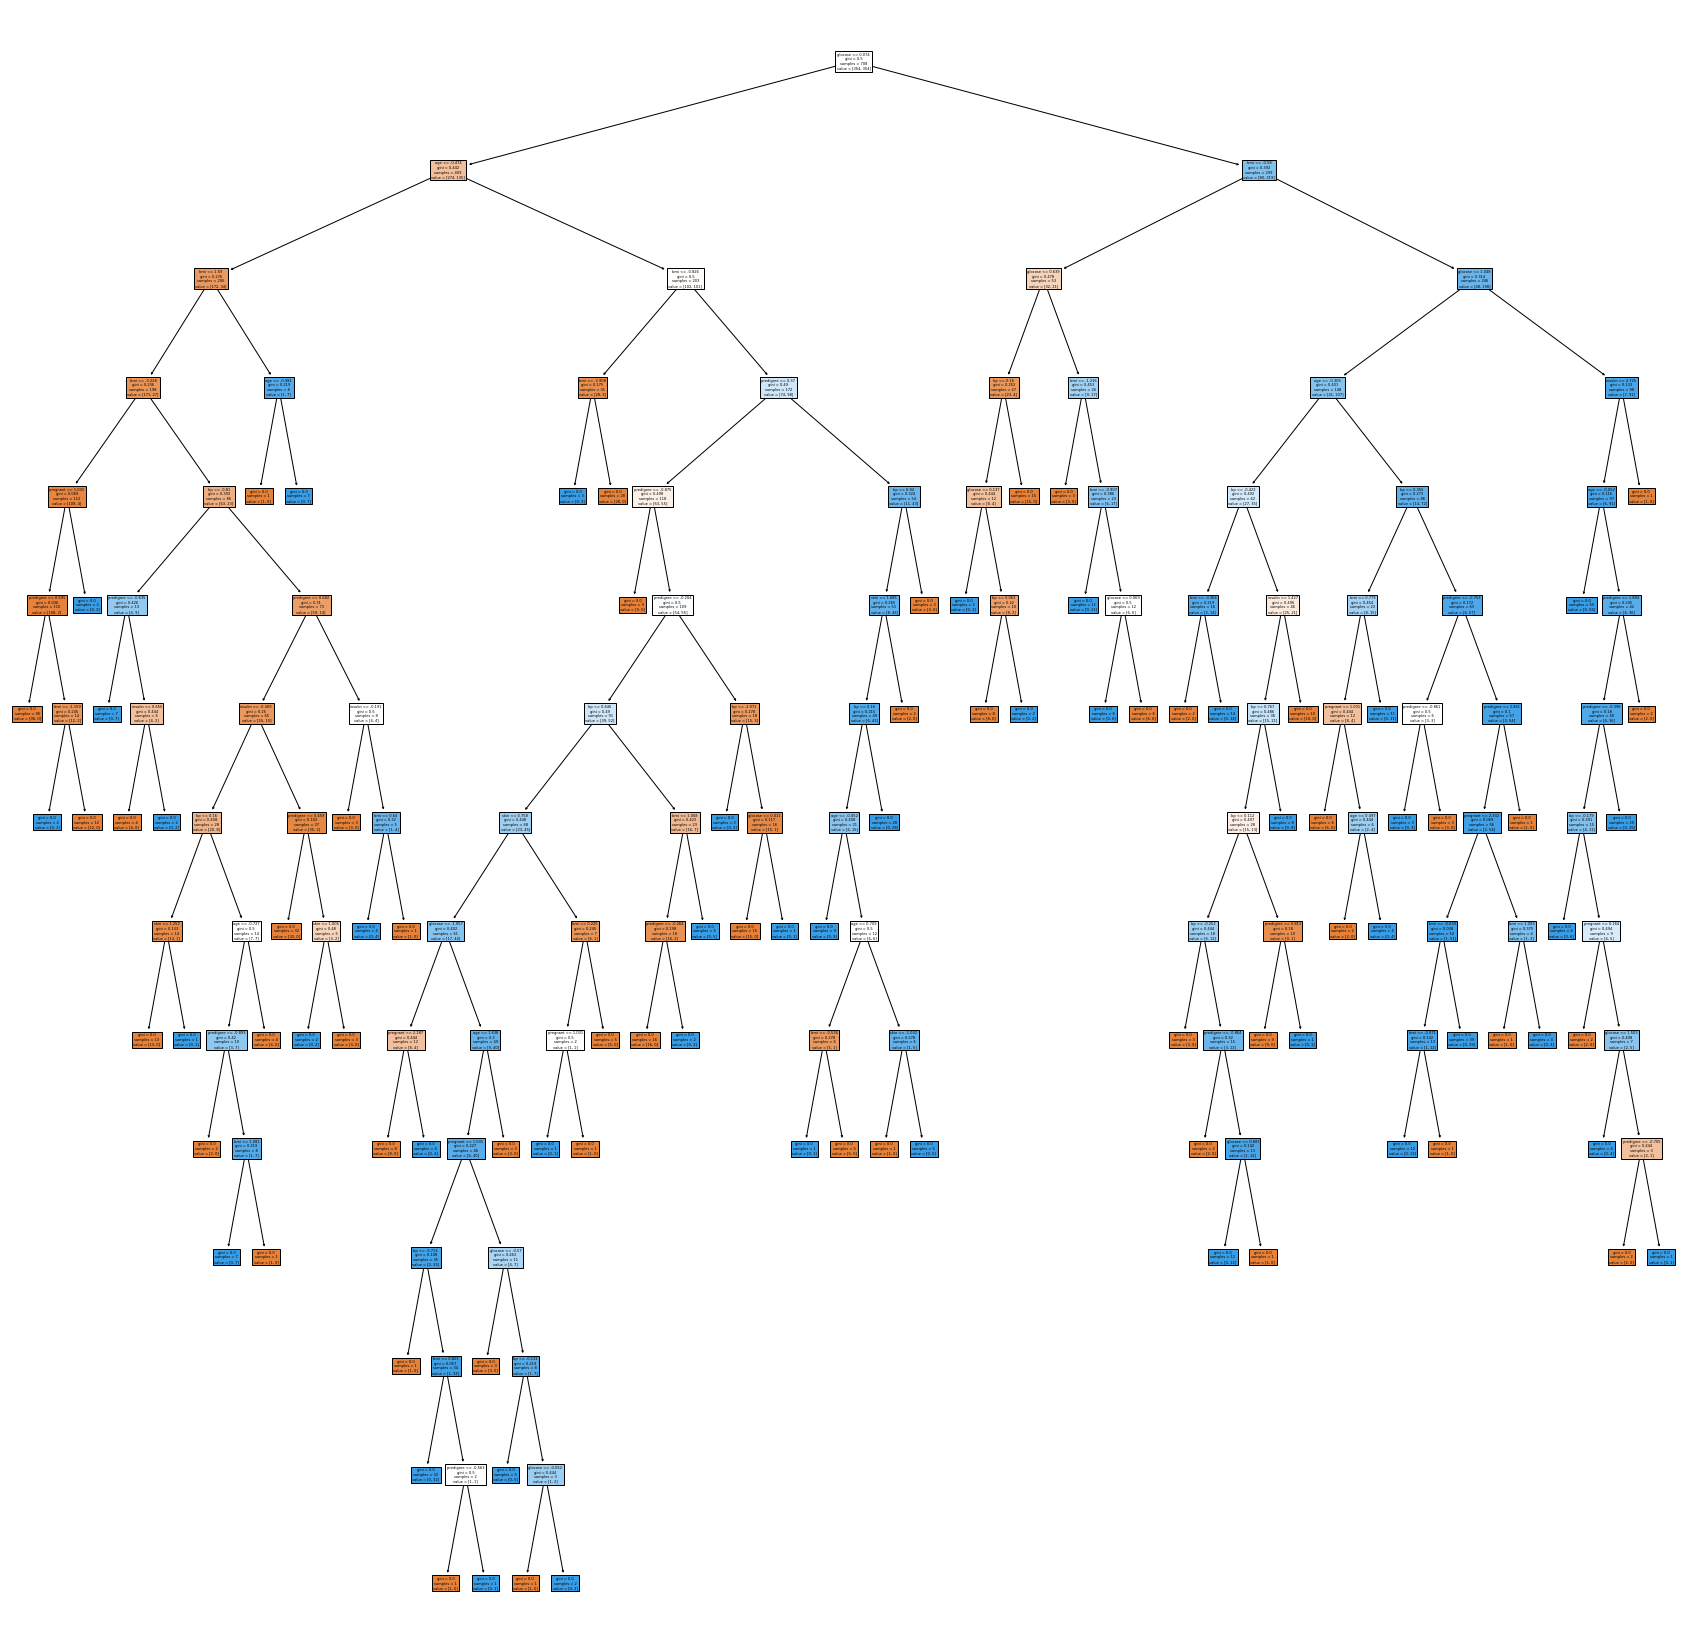

In [26]:
features=X.columns
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [27]:
dt1=DecisionTreeClassifier(max_depth=8)
#can be less than 8 but not more than 8
#by default use method :gini index

In [28]:
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       146
           1       0.62      0.68      0.65        85

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.73      0.73       231

[[111  35]
 [ 27  58]]


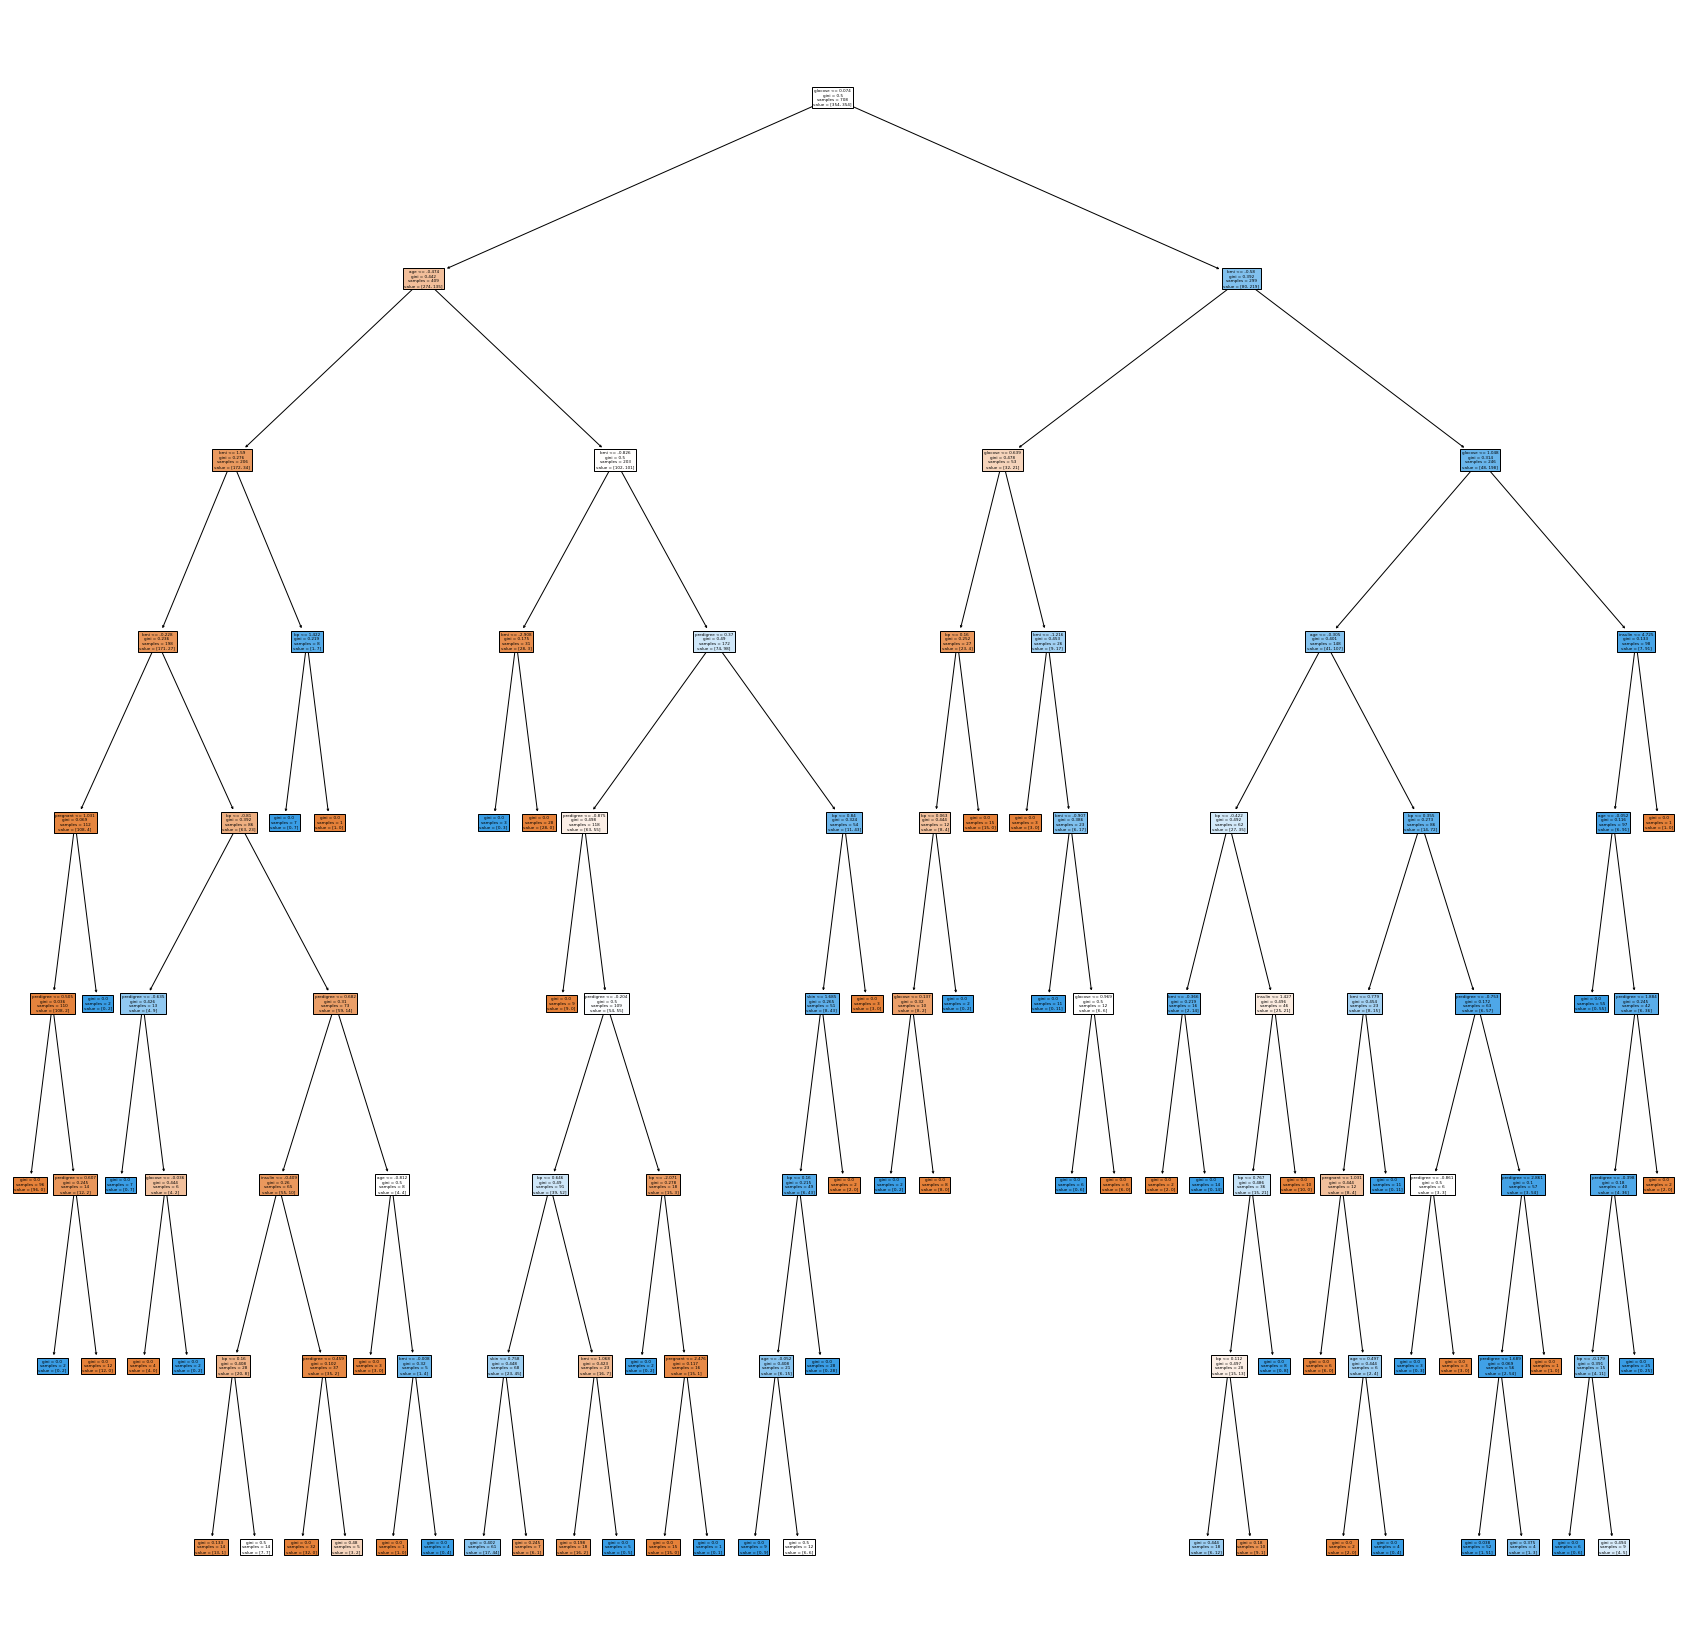

In [29]:
from sklearn import tree

features=X.columns
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [30]:
#2nd purning technique : min_samples_leaf
##create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(min_samples_leaf=60) #by default Gini index method 
#min_samples_leaf =50 or more means not less than=50

In [31]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       146
           1       0.68      0.81      0.74        85

    accuracy                           0.79       231
   macro avg       0.78      0.79      0.78       231
weighted avg       0.80      0.79      0.79       231

[[113  33]
 [ 16  69]]


In [32]:
dt2.feature_importances_

array([0.        , 0.54127654, 0.        , 0.        , 0.        ,
       0.18716945, 0.04934334, 0.22221067])

In [33]:
##create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50)

In [34]:
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       146
           1       0.64      0.80      0.71        85

    accuracy                           0.76       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.78      0.76      0.76       231

[[107  39]
 [ 17  68]]


In [35]:
from mlxtend.classifier import StackingClassifier

In [36]:
meta = LogisticRegression()

In [37]:
model_list=[lr,dt1,dt2]

In [38]:
sc = StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [39]:
sc=create_model(sc)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       146
           1       0.65      0.74      0.69        85

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.77      0.76      0.76       231

[[112  34]
 [ 22  63]]


In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
ada=AdaBoostClassifier(n_estimators=75) 

In [42]:
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       146
           1       0.70      0.73      0.72        85

    accuracy                           0.79       231
   macro avg       0.77      0.78      0.77       231
weighted avg       0.79      0.79      0.79       231

[[120  26]
 [ 23  62]]


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbc = GradientBoostingClassifier(n_estimators=75)   # not >= 100

In [45]:
gbc= create_model(gbc)

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       146
           1       0.72      0.79      0.75        85

    accuracy                           0.81       231
   macro avg       0.79      0.81      0.80       231
weighted avg       0.81      0.81      0.81       231

[[120  26]
 [ 18  67]]


In [46]:
from xgboost import XGBClassifier 

In [47]:
xgc = XGBClassifier(n_estimators = 65 ,reg_alpha=1)

In [48]:
xgc=create_model(xgc)

[14:39:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.69      0.64      0.66        85

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231

[[122  24]
 [ 31  54]]


In [49]:
# SVM : Support Vector Machine
from sklearn.svm import LinearSVC  

In [50]:
svc = LinearSVC(random_state=1)     

In [51]:
svc = create_model(svc)  # by default hard margin means no add any error 

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       146
           1       0.73      0.78      0.75        85

    accuracy                           0.81       231
   macro avg       0.79      0.80      0.80       231
weighted avg       0.81      0.81      0.81       231

[[121  25]
 [ 19  66]]


In [52]:
svc1 = LinearSVC(random_state=1,C=0.6)   # range of C = 0.1 - 0.9

In [53]:
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       146
           1       0.73      0.78      0.75        85

    accuracy                           0.81       231
   macro avg       0.79      0.80      0.80       231
weighted avg       0.81      0.81      0.81       231

[[121  25]
 [ 19  66]]


In [54]:
#Here if add external error on runtime but no changes in score means no 
#effect on score
#means we have data is non-linear data  , not linear dataset 
#So we will use polynomial kernel function means increase the dimension means
#to converts low dimension data into high dimension means if plot 1D then
#converting into 2D dimension and so on .

In [55]:
# 2. polynomial kernal function of SVM so , use inbuilt class SVC

from sklearn.svm import SVC

In [56]:
# create the object of SVC class
poly_svc = SVC(random_state=1,kernel="poly")

In [57]:
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       146
           1       0.79      0.64      0.71        85

    accuracy                           0.81       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.80      0.81      0.80       231

[[132  14]
 [ 31  54]]


In [58]:
# create the object of SVC class
r_svc = SVC(random_state=1,kernel='rbf')
# rbf means radial basis function

In [59]:
r_svc=create_model(r_svc)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       146
           1       0.69      0.78      0.73        85

    accuracy                           0.79       231
   macro avg       0.78      0.79      0.78       231
weighted avg       0.80      0.79      0.79       231

[[117  29]
 [ 19  66]]


In [ ]:
#note:-Applied diff algo/methods but getting good/better results from Decision tree clasifier after using pruning techniques and also gradeint boosting